In [ ]:
!nvidia-smi #make sure that we have access to GPU

Thu Sep 25 11:13:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install inference-sdk -q #install inference-sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
# Install YOLOv8

!pip install -U ultralytics -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.5/112.6 GB disk)


In [ ]:
# Install Roboflow

!pip install roboflow==1.1.48 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.5 MB/s eta 0:00:00


In [ ]:
# import libraries
import os
from IPython.display import Image

from ultralytics import YOLO
from roboflow import Roboflow


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import random
import supervision as sv
import cv2

In [ ]:
# download datasets created in Roboflow

HOME = os.getcwd()
!mkdir -p {HOME}/datasets #create directory for datasets
%cd {HOME}/datasets


rf = Roboflow(api_key="YOUR_API") #enter your API-key
project = rf.workspace("ivm").project("splenic-infection")
version = project.version(8)
dataset = version.download("yolov8") #download datasets

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Splenic-infection-8 in yolov8:: 100%|██████████| 1328/1328 [00:00<00:00, 3309.58it/s]


# Train your model

In [ ]:

%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 degrees=10 flipud=0.5 mosaic=1 mixup=0.25 cutmix=1 #selected augmentations


/content
Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=1, data=/content/datasets/Splenic-infection-8/data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.25, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspec

# Visualize training results

/content


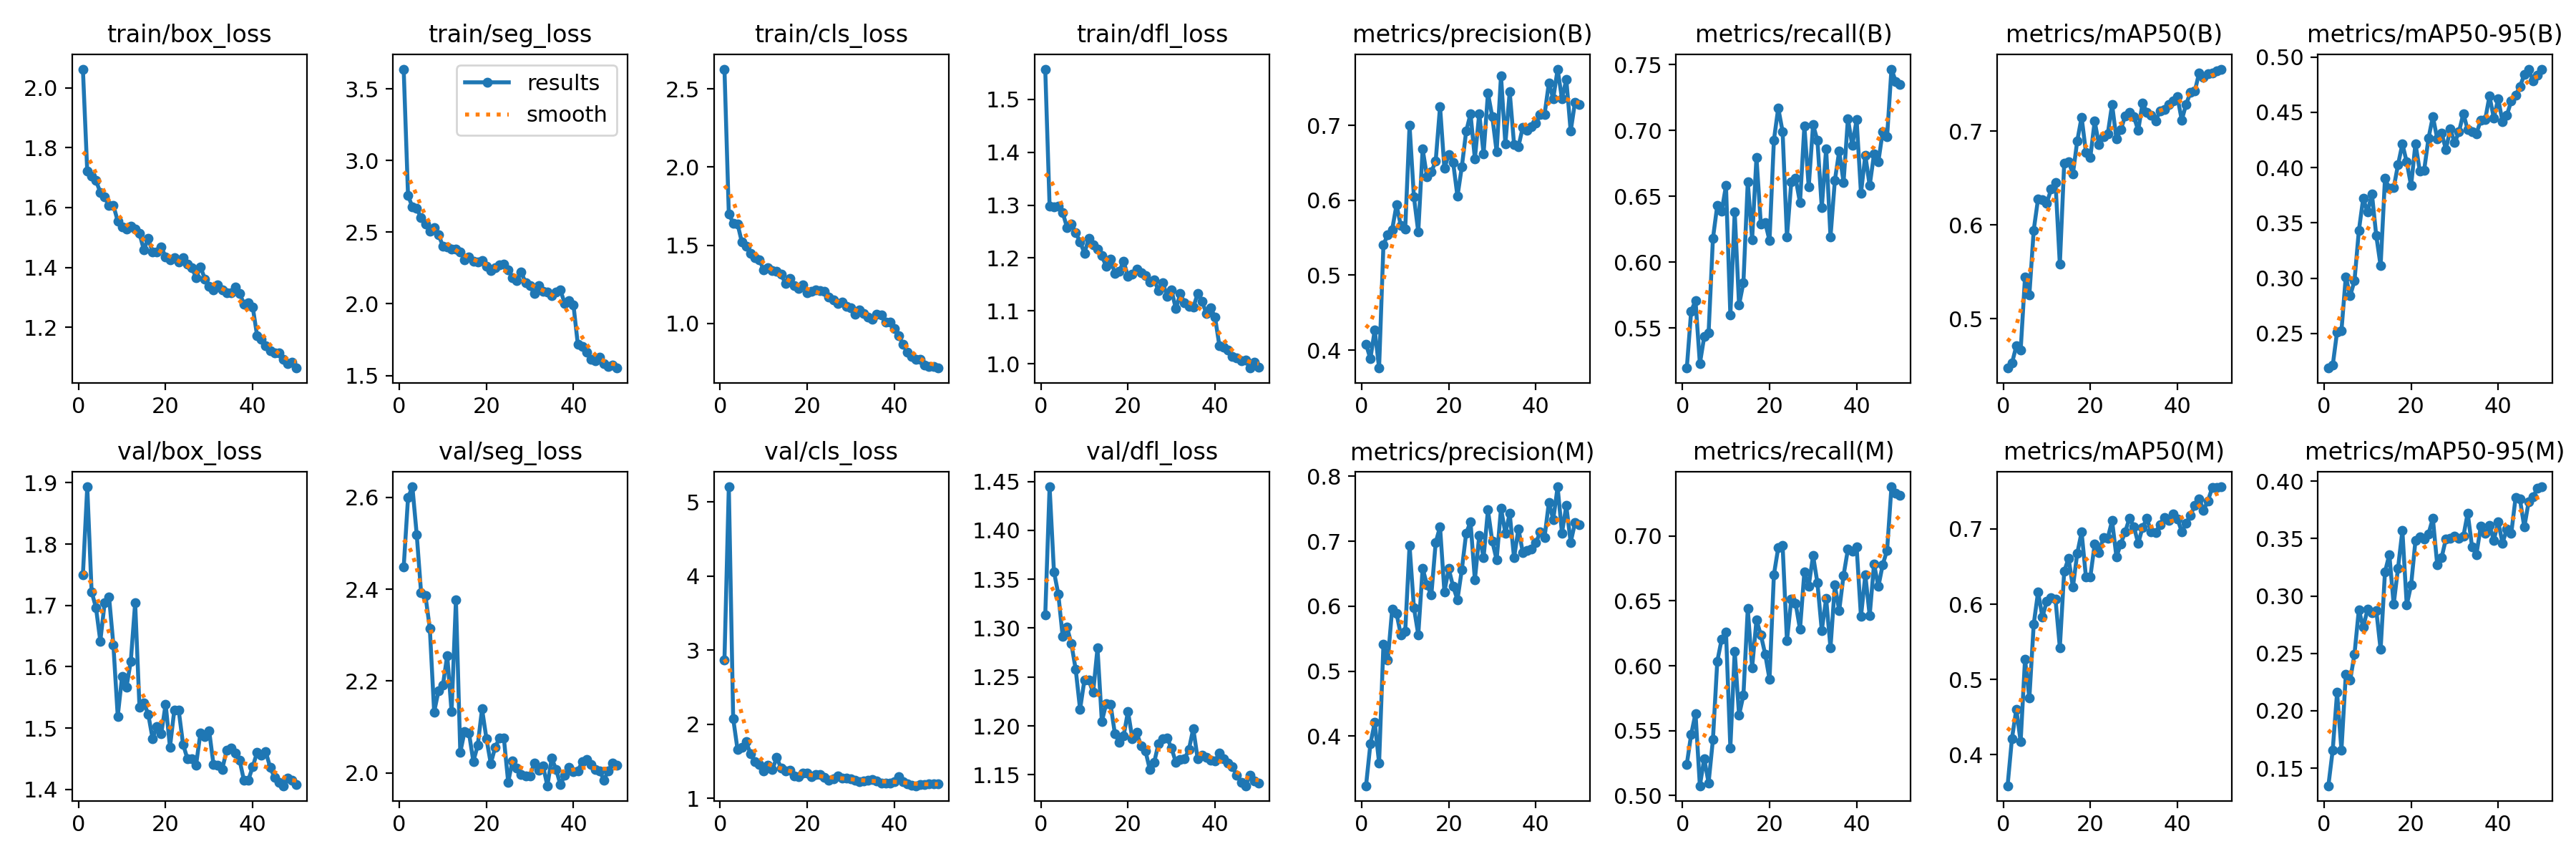

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

## Validate Your Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,781,148 parameters, 0 gradients, 39.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1383.8±363.2 MB/s, size: 33.0 KB)
val: Scanning /content/datasets/Splenic-infection-8/valid/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 51/51 804.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.9it/s 4.3s
                   all         51        616       0.73      0.735      0.766       0.49      0.724      0.729       0.75      0.378
                 cd169         46        186      0.621      0.618      0.623      0.388      0.616      0.613      0.605      0.268
            infected B         27        150      0.852        0.9      0.944      0.666       0.84      0.887      0.915      0.388
        infected 

## Inference

##### Best weights were saved on RF platform under model_id="splenic-infection/8"; one can use it with **their own API-key** and inference-sdk (see below)

In [ ]:
# import the inference-sdk
from inference_sdk import InferenceHTTPClient, InferenceConfiguration


# initialize the client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="YOUR_API" #enter your API-key
)

custom_configuration = InferenceConfiguration(confidence_threshold=0.5)#decide which threshold to use

### Compare manual vs model segmentation

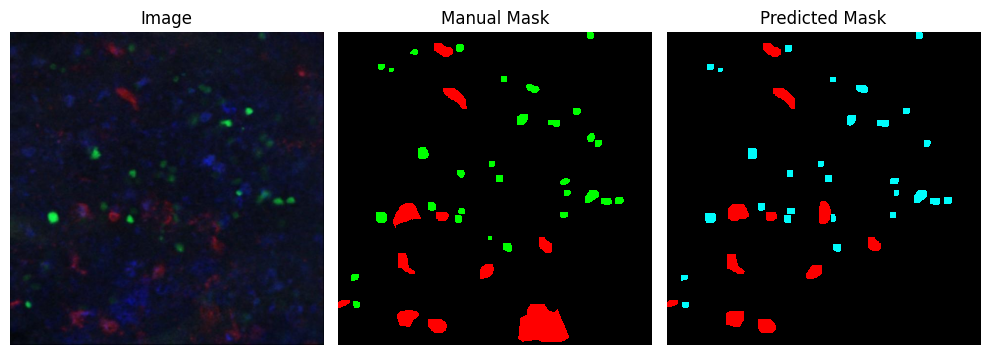

In [ ]:

images_dir = HOME+'/datasets/Splenic-infection-8/test/images/' #select images dir
annotations_dir = HOME+ '/datasets/Splenic-infection-8/test/labels/' #select annotations(manual labels) dir

# select colors for the objects
colors = {0: (255, 0, 0), 1: (0, 255, 0), 2: (255, 255, 0), 3: (0, 0, 255)}


# select random image and corresponding annotation
image_name = random.choice(os.listdir(images_dir))
img_path = images_dir + image_name
annotation_path = annotations_dir + image_name[:-4] + '.txt'


img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) #read image, change colors
real_mask = np.zeros(img.shape, dtype=np.uint8) #create a canvas for the mask

# reconstitute masked image from raw image and txt.file with manual labels
with open(annotation_path, 'r') as file:
      lines = file.readlines()

  # Iterate over each line in the .txt file to get mask points for each object (one line - one object)
for line in lines:
      parts = line.strip().split()
      class_id = int(parts[0])
      x_coord = []
      y_coord= []
      for i in range(int(len(parts[1:])/2)):
          x_coord.append(float(parts[1:][i*2])*img.shape[0])
          y_coord.append(float(parts[1:][i*2+1])*img.shape[1])
      mask_points = np.array(list((zip(x_coord, y_coord))), dtype=np.int32).reshape(-1, 1, 2)

      # Create a binary mask
      mask = np.zeros(img.shape[:2], dtype=np.uint8)
      #cv2.fillPoly(img, [mask_points], (255,150,255))
      cv2.drawContours(real_mask, [mask_points], -1, colors[class_id], thickness=cv2.FILLED)

      # Create a 3-channel mask
      mask_3ch = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

      real_mask = cv2.addWeighted(real_mask, 1, mask_3ch, 0.5, 0) #add a mask of an object to the canvas

# for the same image make prediction with the model
with CLIENT.use_configuration(custom_configuration):
  result = CLIENT.infer(img_path, model_id="splenic-infection/8") #model_id refers to the best weights saved on RF paltform


# load the results into the supervision Detections api
detections_segmentation = sv.Detections.from_inference(result)

# initiate MaskAnnotator
mask_annotator = sv.MaskAnnotator(sv.ColorPalette(colors=[sv.Color.BLUE, sv.Color.YELLOW, sv.Color.GREEN, sv.Color.RED]), opacity=0.99, color_lookup=sv.ColorLookup.CLASS)

# create predicted mask
predicted_mask = mask_annotator.annotate(
    np.zeros(img.shape, dtype=np.uint8), detections=detections_segmentation
)


# vizualize the results
figure, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 24))
ax[0].imshow(img)
ax[1].imshow(real_mask, interpolation="nearest")
ax[2].imshow(predicted_mask, interpolation="nearest")

ax[0].set_title("Image")
ax[1].set_title("Manual Mask")
ax[2].set_title("Predicted Mask")

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

# Visualize segmentation results on custom image

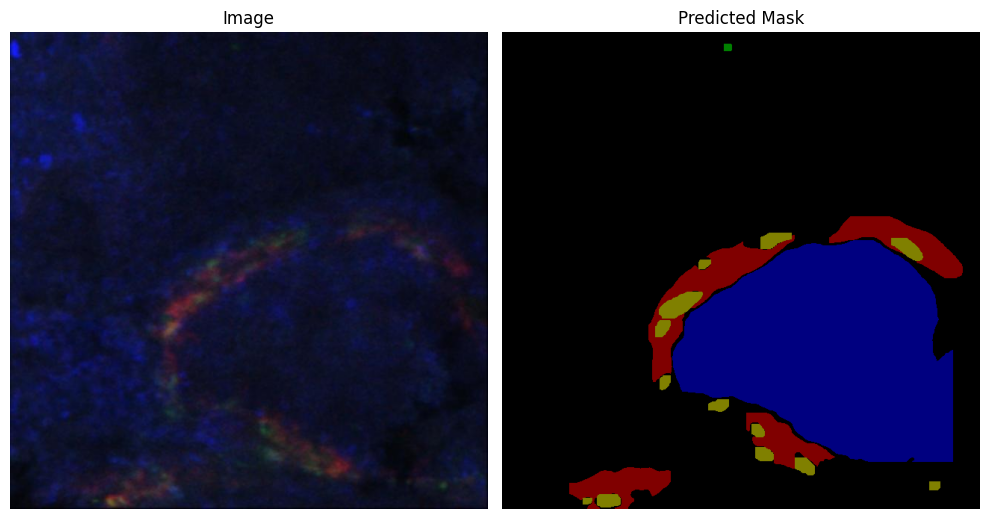

In [ ]:
images_dir = HOME+'/datasets/Splenic-infection-8/test/images/' #select your own images dir


# select random image
image_name = random.choice(os.listdir(images_dir))
img_path = images_dir + image_name

img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB) #read image, change colors


# make prediction
with CLIENT.use_configuration(custom_configuration):
  result = CLIENT.infer(img_path, model_id="splenic-infection/8") #make prediction


# load the results into the supervision Detections api
detections_segmentation = sv.Detections.from_inference(result)

# initiate MaskAnnotator
mask_annotator = sv.MaskAnnotator(sv.ColorPalette(colors=[sv.Color(r=255, g=0, b=0), sv.Color(r=0, g=255, b=0), sv.Color(r=255, g=255, b=0), sv.Color(r=0, g=0, b=255)]), color_lookup=sv.ColorLookup.CLASS)

# create predicted mask
annotated_image = mask_annotator.annotate(
    np.zeros(img.shape, dtype=np.uint8), detections=detections_segmentation
)


# vizualize the results
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 24))

ax[0].imshow(img)
ax[1].imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))

ax[0].set_title("Image")
ax[1].set_title("Predicted Mask")

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

plt.show()

# Calculate areas for each class of objects

In [ ]:
dict = {'filename': [], 'sample': [], 'confidence': [], 'class': [], 'points':[]} #create dictionary to assign model predictions

images_dir = HOME+'/datasets/Splenic-infection-8/test/images/' #select your own images dir

for file in sorted(os.listdir(images_dir)): #iterate over images

  with CLIENT.use_configuration(custom_configuration):
      result = CLIENT.infer(f'{images_dir}/{file}', model_id="splenic-infection/8") #make prediction


  if result['predictions'] == []: #in case no objects are detected on selected image
      dict['filename'].append(file[-50:-44])
      dict['sample'].append(file[-50:-44])
      dict['confidence'].append(np.nan)
      dict['class'].append(np.nan)
      dict['points'].append(np.nan)

  else:
        for prediction in result['predictions']:
          dict['filename'].append(file[-50:-44])
          dict['sample'].append(file[-50:-44])
          dict['confidence'].append(prediction['confidence']) #model confidence
          dict['class'].append(prediction['class']) #1 of 4 classes: cd169, infected cd169, infected B, white pulp
          dict['points'].append([[point['x'], point['y']] for point in prediction['points']]) #coordinates of the mask


df = pd.DataFrame(dict) #create DataFrame from dictionary

df.head(2)

,filename,sample,confidence,class,points
0,s05_z2,s05_z2,0.884705,cd169,"[[554.0, 548.0], [553.0, 549.0], [553.0, 560.0..."
1,s05_z2,s05_z2,0.862397,infected B,"[[402.0, 121.0], [402.0, 138.0], [403.0, 138.0..."


In [ ]:
#calaculate areas from coordinates using Polygon from shapely.geometry
df_copy = df.copy()
df_copy['area'] = np.round(df_copy.apply(lambda x: Polygon(x['points']).area if isinstance(x['points'], list) else 0, axis=1))
df_copy['area'].fillna(0, inplace=True)
df_copy.head(2)

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




,filename,sample,confidence,class,points,area
0,s05_z2,s05_z2,0.884705,cd169,"[[554.0, 548.0], [553.0, 549.0], [553.0, 560.0...",1002.0
1,s05_z2,s05_z2,0.862397,infected B,"[[402.0, 121.0], [402.0, 138.0], [403.0, 138.0...",301.0


In [ ]:
#create pivot_table to summarize the area of all masks of the distinct class for each image
pivot = df_copy.pivot_table(
    values = 'area',
    index = 'sample',
    columns = 'class',
    aggfunc= 'sum',
    fill_value=0
)

pivot

class,cd169,infected B,infected CD169,white pulp
sample,,,,
020_z1,14570.0,0.0,0.0,35612.0
041_z2,806.0,0.0,0.0,0.0
043_z2,0.0,386.0,253.0,0.0
050_z1,13522.0,0.0,0.0,0.0
056_z0,50800.0,106.0,6220.0,0.0
065_z1,18667.0,142.0,3675.0,96084.0
080_z0,19363.0,160.0,2521.0,152063.0
095_z2,4837.0,0.0,984.0,4606.0
s02_z2,18672.0,215.0,4864.0,74019.0


### These results can be used for statistical analysis based on experimental groups